## Building an image classification model using very little data
Based on the tutorial by Francois Chollet @fchollet https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html and the workbook by Guillaume Dominici https://github.com/gggdominici/keras-workshop

This tutorial presents several ways to build an image classifier using keras from just a few hundred or thousand pictures from each class you want to be able to recognize.

We will go over the following options:
 * training a small network from scratch (as a baseline)
 * using the bottleneck features of a pre-trained network
 * fine-tuning the top layers of a pre-trained network

This will lead us to cover the following Keras features:

* fit_generator for training Keras a model using Python data generators
* ImageDataGenerator for real-time data augmentation
* layer freezing and model fine-tuning
* ...and more.

# Data loading

In [1]:
##This notebook is built around using tensorflow as the backend for keras
!pip install pillow
!KERAS_BACKEND=tensorflow python -c "from keras import backend"

Using TensorFlow backend.


In [31]:
%pylab inline
##Updated to Keras 2.0
##Updated to Keras 2.0
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

os.chdir('/Users/z00193k/Desktop/ML_AI_DL/CNN/')

Populating the interactive namespace from numpy and matplotlib


## Data loading from

In [4]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

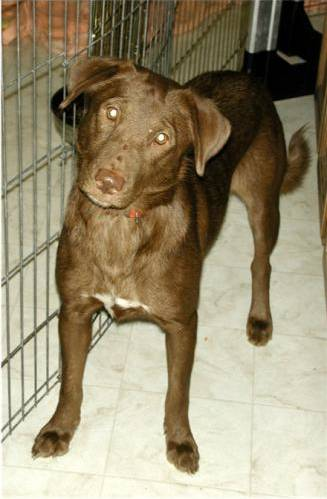

In [8]:
from IPython.display import Image
Image(filename = 'data/train/dogs/dog.1.jpg')

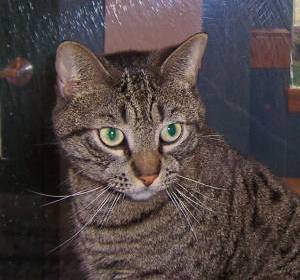

In [10]:
Image(filename = 'data/train/cats/cat.1.jpg')

# Imports

In [11]:
##preprocessing
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

type(validation_generator)

Found 2048 images belonging to 2 classes.
Found 824 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

In [12]:
##Lets look at the training data from the datagenerator
i = 0
for batch in datagen.flow_from_directory(train_data_dir,
        target_size=(img_width, img_height),
        class_mode='binary',batch_size=1,
                          save_to_dir='preview', save_prefix='train', save_format='jpg'):
    i += 1
    if i > 20:
        break  #

Found 2048 images belonging to 2 classes.


In [15]:
!ls preview

cat_0_110.jpeg    cat_0_5137.jpeg   train_10_2631.jpg train_20_4705.jpg
cat_0_1587.jpeg   cat_0_5528.jpeg   train_11_9915.jpg train_2_3843.jpg
cat_0_2182.jpeg   cat_0_5787.jpeg   train_12_7684.jpg train_3_1667.jpg
cat_0_2432.jpeg   cat_0_6127.jpeg   train_13_1551.jpg train_4_2572.jpg
cat_0_2890.jpeg   cat_0_7112.jpeg   train_14_7829.jpg train_5_5494.jpg
cat_0_3704.jpeg   cat_0_7213.jpeg   train_15_4856.jpg train_6_7678.jpg
cat_0_412.jpeg    cat_0_7915.jpeg   train_16_5950.jpg train_7_2600.jpg
cat_0_4163.jpeg   cat_0_792.jpeg    train_17_4560.jpg train_8_2670.jpg
cat_0_4343.jpeg   cat_0_8912.jpeg   train_18_56.jpg   train_9_9944.jpg
cat_0_4430.jpeg   cat_0_9249.jpeg   train_19_5063.jpg
cat_0_4840.jpeg   train_0_3306.jpg  train_1_9793.jpg


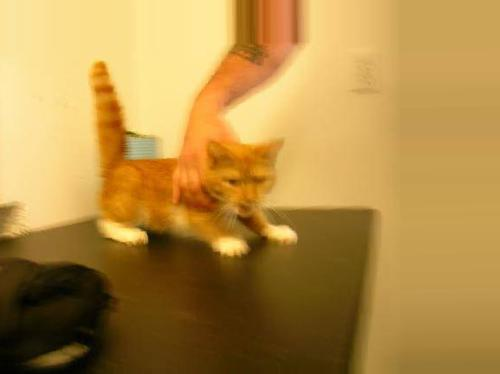

In [17]:
Image(filename = 'preview/cat_0_110.jpeg')

# Small Conv Net

## Model architecture definition

In [18]:
# a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training

In [20]:
epochs = 10
train_samples = 2048
validation_samples = 832

In [21]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)
#About 60 seconds an epoch when using CPU

Epoch 1/10
64/64 [==============================] - 52s - loss: 0.7077 - acc: 0.5439 - val_loss: 0.6691 - val_acc: 0.6117
Epoch 2/10
64/64 [==============================] - 52s - loss: 0.6593 - acc: 0.6133 - val_loss: 0.6485 - val_acc: 0.6274
Epoch 3/10
64/64 [==============================] - 53s - loss: 0.6109 - acc: 0.6821 - val_loss: 0.5855 - val_acc: 0.6833
Epoch 4/10
64/64 [==============================] - 53s - loss: 0.5604 - acc: 0.7207 - val_loss: 0.5763 - val_acc: 0.6893
Epoch 5/10
64/64 [==============================] - 53s - loss: 0.5138 - acc: 0.7520 - val_loss: 0.7927 - val_acc: 0.6420
Epoch 6/10
64/64 [==============================] - 58s - loss: 0.4804 - acc: 0.7593 - val_loss: 0.6378 - val_acc: 0.6796
Epoch 7/10
64/64 [==============================] - 60s - loss: 0.4360 - acc: 0.7930 - val_loss: 0.6199 - val_acc: 0.7209
Epoch 8/10
64/64 [==============================] - 64s - loss: 0.4019 - acc: 0.8135 - val_loss: 0.5937 - val_acc: 0.7318
Epoch 9/10
64/64 [======

In [23]:
model.save_weights('models/basic_cnn_10_epochs.h5')

In [26]:
model.load_weights('models/basic_cnn_10_epochs.h5')

## Validating the models performance

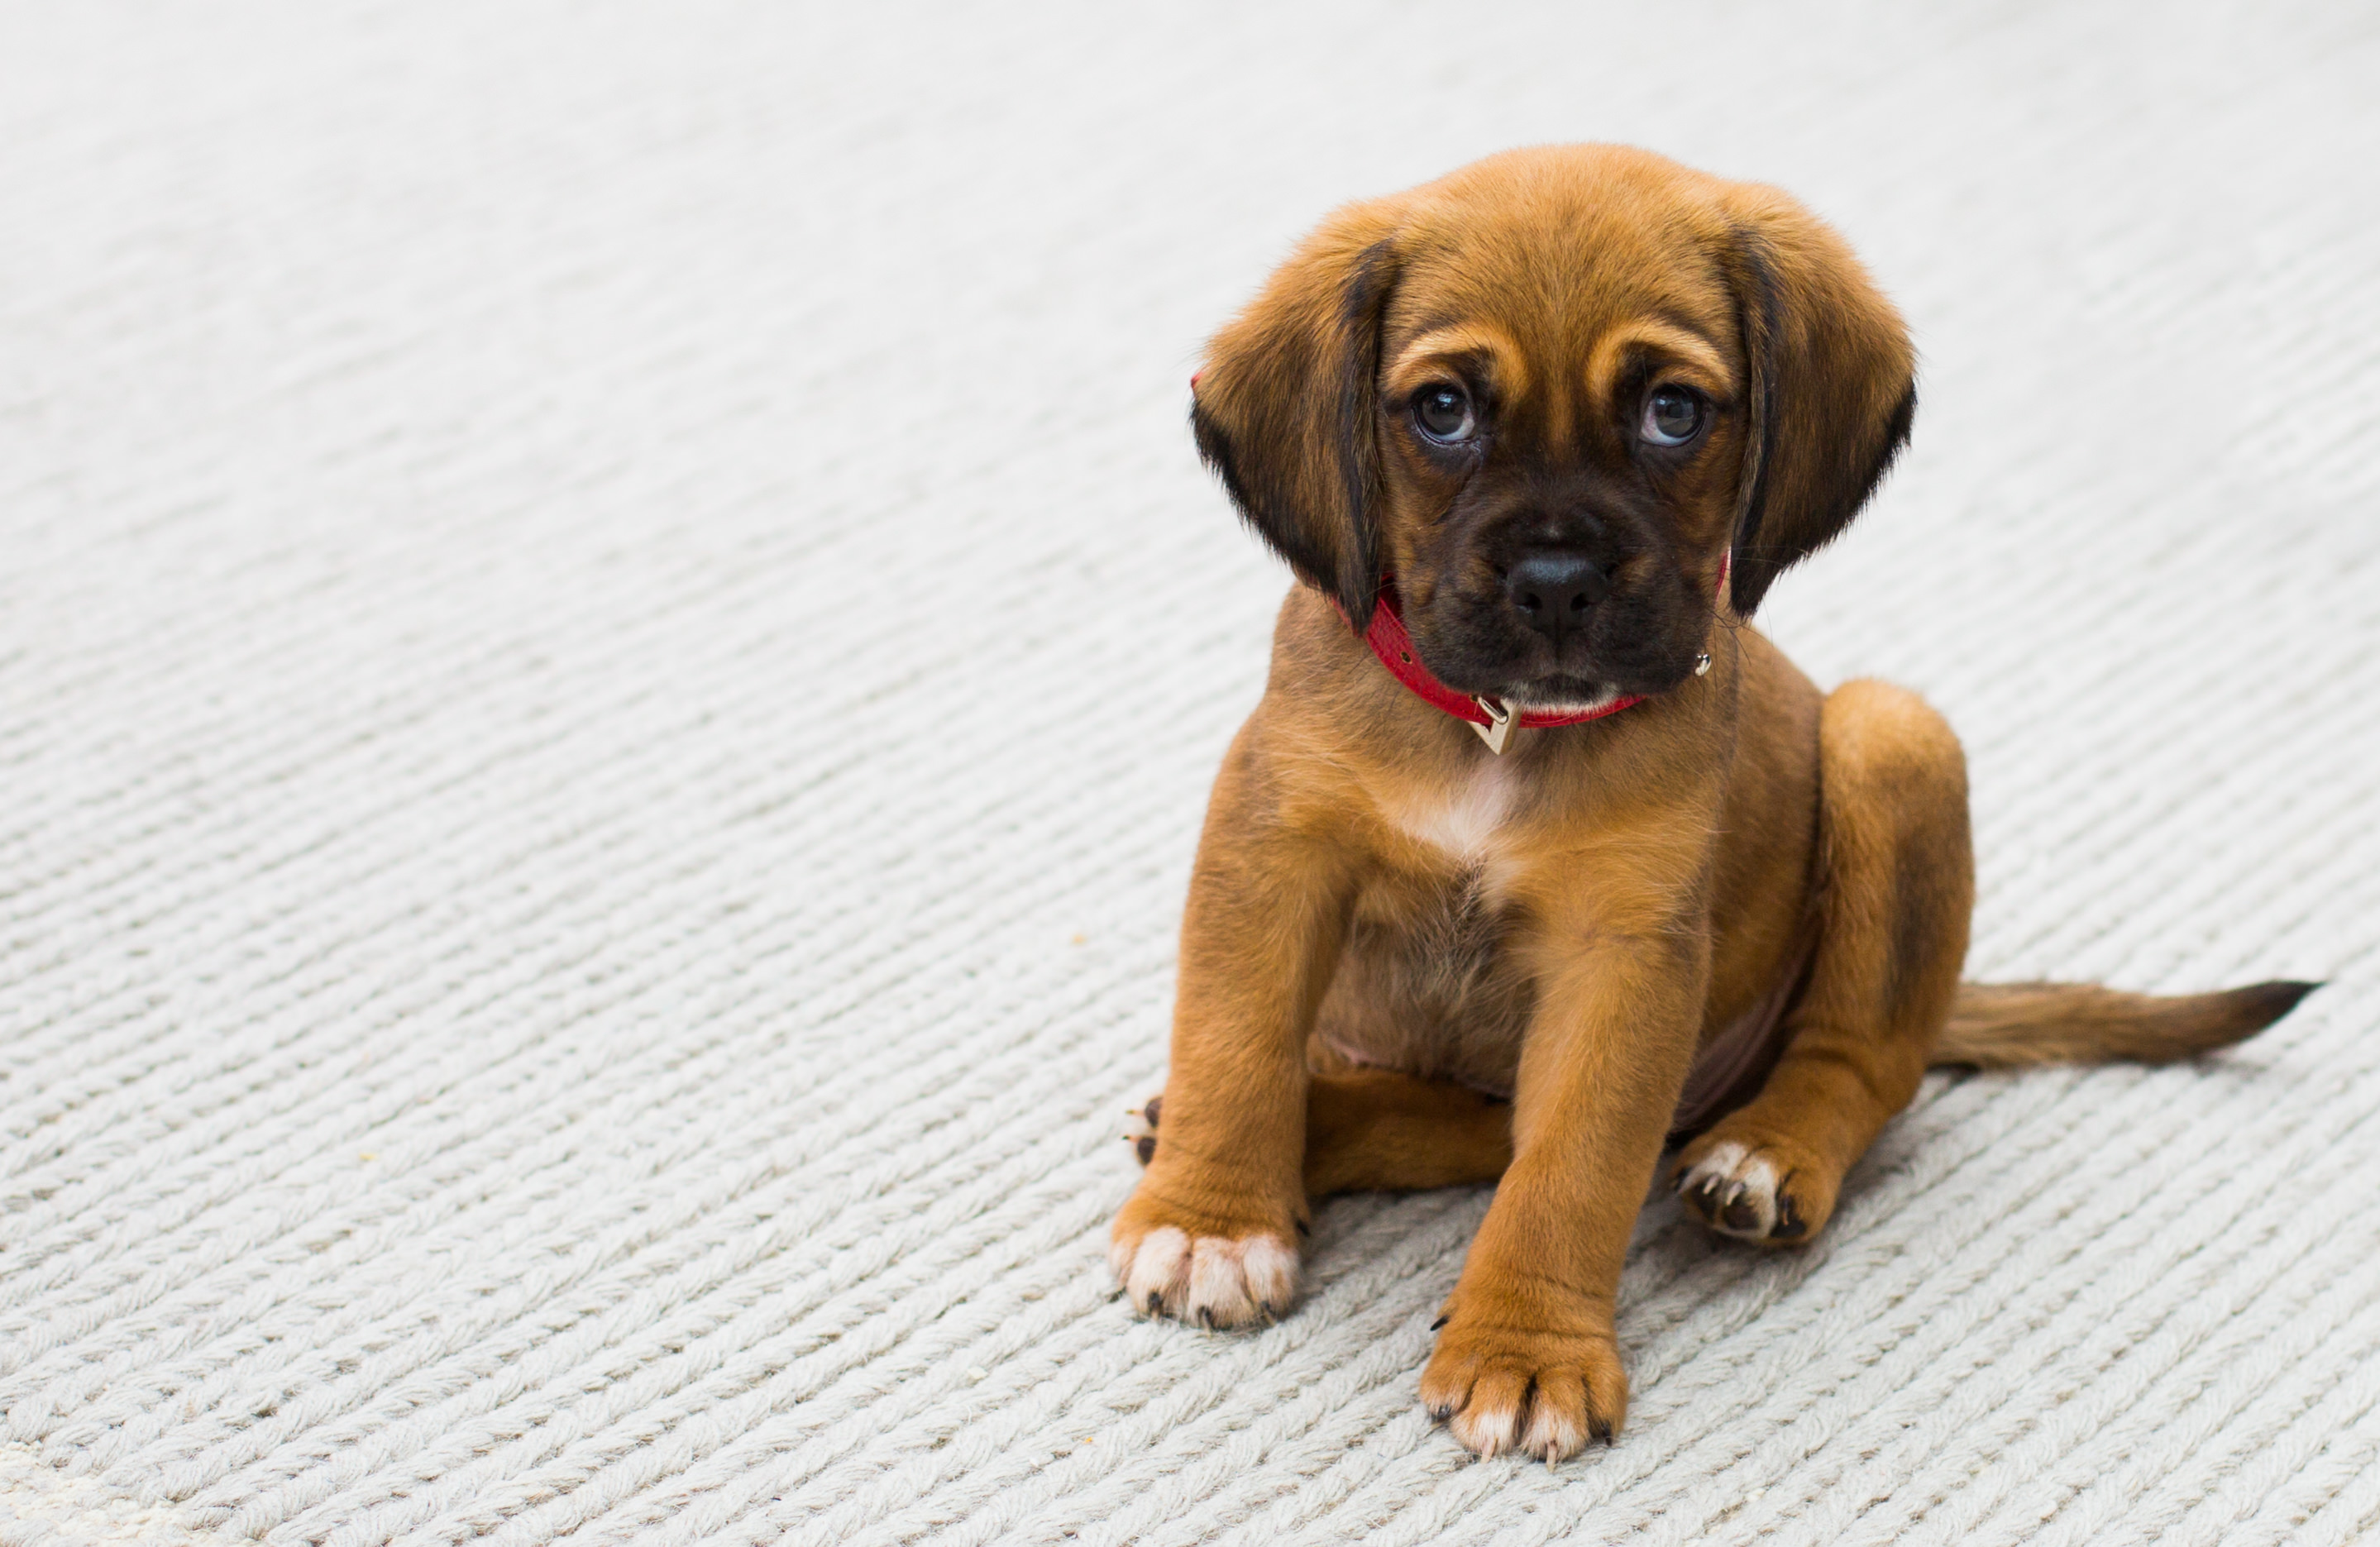

In [25]:
Image(filename = 'testing/dog_test1.jpg')

In [28]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [32]:


##Need to get prediction working
img = load_img('testing/dog_test1.jpg',False, (img_width, img_height))
x = img_to_array(img)
prediction = model.predict(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
print(prediction)

[[ 1.]]


In [34]:
##Need to get prediction working
img = load_img('testing/cat.11672.jpg',False, (img_width, img_height))
x = img_to_array(img)
prediction = model.predict(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
print(prediction)

[[ 1.]]


In [36]:
from keras.applications.vgg16 import VGG16
#model_vgg = VGG16(weights='imagenet', include_top=True)
from quiver_engine import server
#server.launch(model_vgg,input_folder='./raj')

ImportError: No module named quiver_engine

In [37]:
model.evaluate_generator(validation_generator, validation_samples)

[0.68296486003215884, 0.73073422324671911]